So sánh giữa Logistic Regression và Support Vector Machine

### 1. Import thư viên cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### 2. Đọc tập dữ liệu

In [2]:
dataset = pd.read_csv('emails.csv')

In [3]:
# Kiểm tra tập dữ liệu
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Sau khi quan sát tập dữ liệu thì cột đầu tiên sẽ là chỉ số cho thứ tự của email, cột cuối cùng sẽ là nhãn - email là spam hay bình thường, các cột còn lại sẽ là tần số xuất hiện của các từ tương ứng với header của cột, cũng chính là các đặc trưng.

In [4]:
# Chia tập dữ liệu thành đặc trưng và nhãn lớp
X = dataset.iloc[: , 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X.shape

(5172, 3000)

### 3. Tiền xử lý dữ liệu

#### 3.1 Phân chia tập dữ liệu thành train set và test set

Nhận thấy tập dữ liệu có 5172 samples. Do đó, ta sẽ chia tập train khoảng 90% và tập test tầm 10% là hợp lý.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=42)

In [7]:
# Kiểm tra shape:
print('Shape của X train: ', X_train.shape)
print('Shape của y train: ', y_train.shape)
print('Shape của X test: ', X_test.shape)
print('Shape của y test: ', y_test.shape)

Shape của X train:  (4654, 3000)
Shape của y train:  (4654,)
Shape của X test:  (518, 3000)
Shape của y test:  (518,)


#### 3.2 Chuẩn hóa dữ liệu

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Kiểm tra một vài samples
print('5 samples đầu của X train sau khi chuẩn hóa:\n', X_train[:5])
print('5 samples đầu của X test sau khi chuẩn hóa:\n', X_test[:5])

5 samples đầu của X train sau khi chuẩn hóa:
 [[-2.23915933e-01 -2.28045963e-01  3.36466635e-01 ... -5.93454801e-02
   3.30695556e-02 -6.78954940e-02]
 [-4.81586275e-01 -5.43197674e-01 -2.88040010e-01 ... -5.93454801e-02
  -3.16716153e-01 -6.78954940e-02]
 [-4.81586275e-01  1.92156318e-01 -2.88040010e-01 ... -5.93454801e-02
  -3.16716153e-01 -6.78954940e-02]
 [ 1.19644523e-01 -1.79448224e-02  1.97687380e-01 ... -5.93454801e-02
  -3.16716153e-01 -6.78954940e-02]
 [ 1.19644523e-01  1.34771259e+00 -1.04815015e-02 ... -5.93454801e-02
   2.90652834e+01 -6.78954940e-02]]
5 samples đầu của X test sau khi chuẩn hóa:
 [[-0.48158627 -0.54319767 -0.28804001 ... -0.05934548 -0.31671615
  -0.06789549]
 [ 0.54909509  1.45276316  4.22228576 ... -0.05934548 -0.31671615
  -0.06789549]
 [-0.48158627  0.82245974 -0.14926076 ... -0.05934548  1.43221239
  -0.06789549]
 [-0.56747639 -0.64824824 -0.28804001 ... -0.05934548 -0.31671615
  -0.06789549]
 [ 0.37731486 -0.01794482 -0.21865038 ... -0.05934548  1.08

### 4. Triển khai thuật toán

Trong phần này, em sẽ triển khai 3 thuật toán tối ưu trên mô hình Logistic Regression và SVM để tiện cho việc so sánh:
- Mini-batch Gradient Descent (Dạng tổng quát hơn của SGD và Gradient Descent): Có thể kết hợp với Gradient Descent with momentum hoặc adam, ....
- Gradient Descent with momentum
- Adam

Trong các bài tập trước, em thường triển khai dưới dạng một vector trọng số w và thêm một cột 1 vào X. Tuy nhiên, ở các phần sau em sẽ triển khai với hai parameter là w, b. (Để làm quen với cách thức triển khai của Neural Network luôn)

#### 4.1 Triển khai Gradient Descent (Nhắc lại)

Cách thức cập nhật parameter:
$$ w = w - \alpha \text{ } dw$$
$$ b = b - \alpha \text{ } db$$

Với:
- $\alpha$ là learning rate (tốc độ học)
- $dw$ là đạo hàm của hàm mất mát theo w
- $db$ là đạo hàm của hàm mất mát theo b

#### 4.2 Triển khai Mini-batch Gradient Descent

Khác với Gradient Descent (Đầy đủ hơn là Batch Gradient Descent), ta không tính toán trực tiếp trên toàn bộ tập dữ liệu mà chia làm các phần nhỏ (minibatch), sau đó dùng gradient descent trên các phần nhỏ ấy.

Một lần duyệt qua hết tất cả mini-batch là một epoch.

Cách thức triển khai cho 1 epoch:
- Bước 1: Xáo trộn tập dữ liệu (Đảm bảo mỗi epoch thì các mini-batch sẽ khác nhau, tránh overfitting)
- Bước 2: Phân chia dữ liệu thành các mini-batch. Số lượng phần tử của các mini-batch ta tạm gọi là minibatch_size
- Bước 3: Dùng Gradient Descent trên các mini-batch

Lưu ý: 
- Số lượng phần tử của các mini-batch nên là lũy thừa của 2 (Có lẽ là nó phù hợp với tính toán CPU, GPU nên sẽ nhanh hơn) như 64, 128, 256, ...
- Khi minibatch_size = 1: Batch Gradient Descent
- Khi minibatch_size = số lượng phần tử của tập dữ liệu huấn luyện: Stochastic Gradient Descent

#### 4.3 Triển khai Gradient Descent with Momentum

Việc áp dụng mini-batch thường làm việc tối ưu sẽ "dao động" nhiều hơn. Nhờ vào việc áp dụng Exponentially Weighted Averages thì khi ta áp dụng Gradient Descent with Momentum thì sẽ làm giảm các "dao động" này và nó trông có vẻ như sẽ nhanh hơn. 

Cách thức cập nhật trọng số với GD with Momentum:
$$ \begin{cases}
v_{dw} = \beta v_{dw} + (1 - \beta) dw \\
w = w - \alpha v_{dw}
\end{cases}$$

$$\begin{cases}
v_{db} = \beta v_{db} + (1 - \beta) db\\
b = b - \alpha v_{db} 
\end{cases}$$

Trong đó:
- $\alpha$ là learning rate (tốc độ học)
- $\beta$ là trọng số trong việc tính trung bình Exponentially Weighted Averages. Mặc định là 0.9

#### 4.4 Triển khai Adam

Adam là một trong những thuật toán mạnh mẽ trong việc tối ưu khi huấn luyện các mạng nơ-ron. Nó kết hợp ý tưởng của RMSProp (RMSProp sẽ thay đổi learning rate thích ứng với việc huấn luyện mô hình) và Momentum.

Cách thức cập nhật trọng số trong Adam

$$\begin{cases}
v_{dw} = \beta_1 v_{dw} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial w } \\
v_{db} = \beta_1 v_{db} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial b } \\
s_{dw} = \beta_2 s_{dw} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial w })^2 \\
s_{db} = \beta_2 s_{db} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial b })^2 \\
w = w - \alpha \frac{v_{dw}}{\sqrt{s_{dw}} + \varepsilon}\\
w = w - \alpha \frac{v_{db}}{\sqrt{s_{db}} + \varepsilon}
\end{cases}$$

Trong đó:
- $\alpha$ là learning rate (tốc độ học)
- $\beta_1$ và $\beta2$ là 2 hyperparameters dùng để kiểm soát hai Exponentially Weighted Averages
- $\epsilon$: Thêm vào để tránh trường hợp chia cho 0

#### 4.5 Tiến hành triển khai

Trong phần này, em sẽ triển khai với lập trình hướng đối tượng để có cấu trúc rõ ràng, cũng như có thể tái sử dụng trong tương lai.

In [12]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000, C=1.0, mini_batch_size=None,
                 epsilon=1e-8, optimizer='GD', beta=0.9, beta1=0.9, 
                 beta2=0.999, print_costs=False):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.C = C
        self.print_costs = print_costs
        self.w = None
        self.b = None

        self.mini_batch_size = mini_batch_size
        self.epsilon = epsilon
        self.optimizer = optimizer

        self.costs = [] # Dùng cho batch
        self.epochs_for_print = [] # Dùng cho batch

        self.all_costs = [] # Dùng cho mini-batch để trực quan hơn

        self.beta = beta # Dùng cho Momentum
        self.beta1 = beta1 # Dùng cho Adam
        self.beta2 = beta2 # Dùng cho Adam
        self.mini_batch_size = mini_batch_size
        self.w = None
        self.b = None
        self.v_dw = None # Dùng cho Momentum và Adam
        self.v_db = None # Dùng cho Momentum và Adam
        self.s_dw = None # Dùng cho Adam 
        self.s_db = None # Dùng cho Adam
        

    def initialize_params(self, shape):
        self.w = np.zeros((shape, 1))
        self.b = 0
        if (self.optimizer == 'momentum'):
            self.v_dw = np.zeros(self.w.shape)
            self.v_db = 0
        elif (self.optimizer == 'adam'):
            self.v_dw = np.zeros(self.w.shape)
            self.v_db = 0
            self.s_dw = np.zeros(self.w.shape)
            self.s_db = 0

    def margin(self, X, y):
        m = X.shape[0]
        margin = 1 - y * (np.dot(X, self.w) + self.b)
        margin = np.maximum(0, margin)
        return margin

    def cost_function(self, X, y):
        m = X.shape[0]
        margin = self.margin(X, y)
        regularization = 1 / 2 * np.dot(self.w.T, self.w)
        J = 1 / m * np.sum(margin) + self.C * regularization
        return J[0][0]

    def gradient(self, X, y):
        m = X.shape[0]
        margin = self.margin(X, y)
        loss = np.where(margin > 0, 1, 0)  # Loss for each data point
        loss = loss.reshape(-1, 1)

        dw = -(1 / m) * np.dot(X.T, loss * y) + self.C * self.w
        db = -(1 / m) * np.sum(loss * y)

        return dw, db

    '''Min-batch Gradient Desent'''
    def random_mini_batches(self, X, y, mini_batch_size = 64, seed = 0):
        """
        Input:
            - X: Dữ liệu đầu vào
            - y: Nhãn lớp 
            - mini_batch_size: số lượng example trong mỗi mini-batch
            - seed: giá trị để đảm bảo mỗi lần random sẽ khác biệt hoàn toàn

        Output:
            mini_batches: list của những phần tử (mini_batch_X, mini_batch_Y)
        """
        np.random.seed(seed)            
        m = X.shape[1]                  
        mini_batches = []

        # Bước 1: Xáo trộn
        permutation = list(np.random.permutation(m))
        shuffled_X = X[permutation, :]
        shuffled_y = y[permutation, :]

        # Bước 2: Phân chia X, y thành các mini-batch
        num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[k*mini_batch_size: (k+1) * mini_batch_size, :]
            mini_batch_Y = shuffled_y[k*mini_batch_size: (k+1) * mini_batch_size, :]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
        
        # Xử lý mini-batch cuối cùng
        if m % mini_batch_size != 0:
            mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:, :]
            mini_batch_Y = shuffled_y[num_complete_minibatches*mini_batch_size:, :]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
        
        return mini_batches

    # Cập nhật trọng số với Gradient Descent truyền thống
    def update_parameters_with_GD(self, X, y):
        dw, db = self.gradient(X, y)
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    # Cập nhật trọng số với Gradient Descent with Momentum
    def update_parameters_with_momentum(self, X, y):
        dw, db = self.gradient(X, y)
        self.v_dw = self.beta * self.v_dw + (1-self.beta) * dw
        self.v_db = self.beta * self.v_db + (1-self.beta) * db
        self.w -= self.learning_rate * self.v_dw
        self.b -= self.learning_rate * self.v_db
    
    # Cập nhật trọng số với adam
    def update_parameters_with_adam(self, X, y):
        dw, db = self.gradient(X, y)
        #Momentum
        self.v_dw = self.beta1 * self.v_dw + (1-self.beta1) * dw
        self.v_db = self.beta1 * self.v_db + (1-self.beta1) * db

        #RMSprop
        self.s_dw = self.beta2 * self.s_dw + (1-self.beta2) * dw**2
        self.s_db = self.beta2 * self.s_db + (1-self.beta2) * db**2

        self.w -= self.learning_rate * self.v_dw / (self.s_dw ** (1/2) + self.epsilon)
        self.b -= self.learning_rate * self.v_db / (self.s_db ** (1/2) + self.epsilon)

    def mini_batch_gradient_descent(self, X, y):
        m = X.shape[0]
        seed = 0
        for i in range(self.num_epochs):
            seed = seed + 1
            minibatches = self.random_mini_batches(X, y, self.mini_batch_size, seed)
            cost_total = 0

            for minibatch in minibatches:
                (minibatch_X, minibatch_y) = minibatch
                cost = self.cost_function(minibatch_X, minibatch_y)
                
                cost_total += cost
                if (self.optimizer == 'GD'):
                    self.update_parameters_with_GD(minibatch_X, minibatch_y)

                elif (self.optimizer == 'momentum'):
                    self.update_parameters_with_momentum(minibatch_X, minibatch_y)

                elif (self.optimizer == 'adam'):
                    self.update_parameters_with_adam(minibatch_X, minibatch_y)
                    
            cost_avg = cost_total / m
            self.all_costs.append(cost_avg)
            
            if self.print_costs and (i+1) % 100 == 0 or (i == 0):
                print(f'Cost value after {i+1} epoch(s): {cost_avg}')
                self.costs.append(cost_avg)
                self.epochs_for_print.append(i)

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        y = np.where(y == 1, 1, -1)
        self.initialize_params(X.shape[1])
        if (self.mini_batch_size == 1 or self.mini_batch_size == None):
            print("Batch Gradient Descent...")
            self.mini_batch_gradient_descent(X, y)
        else:
            if (self.mini_batch_size == X.shape[0]):
                print("Stochastic Gradient Descent...")
            else:
                print(f"Mini-batch Gradient Descent with {self.mini_batch_size} mini-batches ...")
            self.mini_batch_gradient_descent(X, y)

    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        y_pred = np.sign(y_pred)
        y_pred = np.where(y_pred == 1, 1, 0)
        return y_pred

    def plot_cost_history(self):
        if self.print_costs:
            import matplotlib.pyplot as plt
            if self.mini_batch_size > 1:
                plt.plot(range(self.num_epochs), self.all_costs)
                plt.xlabel('Iterations')
            else:
                plt.plot(self.epochs_for_print, self.costs)
                plt.xlabel("Epochs")
            plt.ylabel("Cost")
            plt.title("Cost History")
            plt.show()


### 5. So sánh các thuật toán

#### 5.1 Gradient Descent truyền thống (Batch Gradient Descent)

Batch Gradient Descent...
Cost value after 1 epoch(s): 0.2608008155201489
Cost value after 100 epoch(s): 0.1429816170884766
Cost value after 200 epoch(s): 0.1354633657402057
Cost value after 300 epoch(s): 0.14733191174999422
Cost value after 400 epoch(s): 0.14197988196157887
Cost value after 500 epoch(s): 0.14006831523517332
Cost value after 600 epoch(s): 0.14440940244253725
Cost value after 700 epoch(s): 0.13767608952332028
Cost value after 800 epoch(s): 0.14220199728052674
Cost value after 900 epoch(s): 0.14148913098779126
Cost value after 1000 epoch(s): 0.1398884122965355


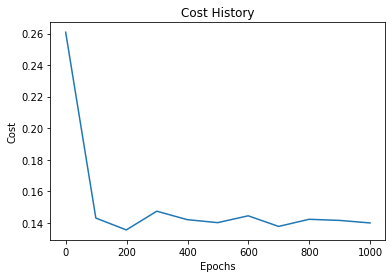

In [15]:
svm_gd = SVM(learning_rate=0.001, num_epochs=1000, C=0.3,
          mini_batch_size=1, print_costs=True,
          optimizer='GD')
svm_gd.fit(X_train, y_train)
svm_gd.plot_cost_history()

In [16]:
from sklearn.metrics import accuracy_score
y_pred1 = svm_gd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9517374517374517


#### 5.2 Mini-batch Gradient Descent (Cập nhật với GD)

Mini-batch Gradient Descent with 64 mini-batches ...
Cost value after 1 epoch(s): 0.008246005717398398
Cost value after 100 epoch(s): 0.0015900724695098972
Cost value after 200 epoch(s): 0.0015501368775923865
Cost value after 300 epoch(s): 0.0015286669427331328
Cost value after 400 epoch(s): 0.0015155177049137388
Cost value after 500 epoch(s): 0.0015092787526584887
Cost value after 600 epoch(s): 0.001502637726324423
Cost value after 700 epoch(s): 0.0014984836397002803
Cost value after 800 epoch(s): 0.0014947616458494872
Cost value after 900 epoch(s): 0.0014931114545470579
Cost value after 1000 epoch(s): 0.0014923343982478111


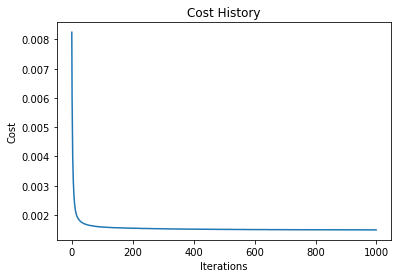

In [17]:
svm_minibatch_gd = SVM(learning_rate=0.001, num_epochs=1000, C=0.3,
          mini_batch_size=64, print_costs=True,
          optimizer='GD')
svm_minibatch_gd.fit(X_train, y_train)
svm_minibatch_gd.plot_cost_history()

In [18]:
from sklearn.metrics import accuracy_score
y_pred2 = svm_minibatch_gd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9671814671814671


#### 5.3 Minibatch Gradient Descent với Momentum

Mini-batch Gradient Descent with 64 mini-batches ...
Cost value after 1 epoch(s): 0.008675153482013056
Cost value after 100 epoch(s): 0.001588826481282945
Cost value after 200 epoch(s): 0.001548369124473155
Cost value after 300 epoch(s): 0.0015262792732352105
Cost value after 400 epoch(s): 0.0015140155087631497
Cost value after 500 epoch(s): 0.0015072180316167546
Cost value after 600 epoch(s): 0.0015012656289799674
Cost value after 700 epoch(s): 0.0014959967193481508
Cost value after 800 epoch(s): 0.0014934812577873334
Cost value after 900 epoch(s): 0.0014928148884385387
Cost value after 1000 epoch(s): 0.001489591975737688


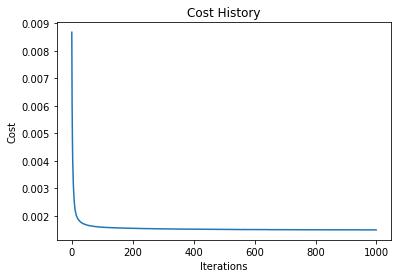

In [24]:
svm_minibatch_momentum = SVM(learning_rate=0.001, num_epochs=1000, C=0.3,
          mini_batch_size=64, print_costs=True,
          optimizer='momentum')
svm_minibatch_momentum.fit(X_train, y_train)
svm_minibatch_momentum.plot_cost_history()

In [25]:
from sklearn.metrics import accuracy_score
y_pred3 = svm_minibatch_momentum.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.9671814671814671


#### 5.7 Minibatch Gradient Descent với Adam

Mini-batch Gradient Descent with 64 mini-batches ...
Cost value after 1 epoch(s): 0.00584340148604727
Cost value after 100 epoch(s): 0.0017223024227331378
Cost value after 200 epoch(s): 0.001746870670465826
Cost value after 300 epoch(s): 0.001754364648983219
Cost value after 400 epoch(s): 0.00172284987954294
Cost value after 500 epoch(s): 0.0017560542581103217
Cost value after 600 epoch(s): 0.0017361443453387576
Cost value after 700 epoch(s): 0.0017834340264216372
Cost value after 800 epoch(s): 0.0017255092060515253
Cost value after 900 epoch(s): 0.0017529293193188356
Cost value after 1000 epoch(s): 0.0017314824189279129


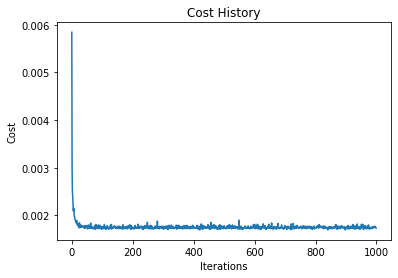

In [28]:
svm_minibatch_adam = SVM(learning_rate=0.001, num_epochs=1000, C=0.3,
          mini_batch_size=64, print_costs=True,
          optimizer='adam')
svm_minibatch_adam.fit(X_train, y_train)
svm_minibatch_adam.plot_cost_history()

In [29]:
from sklearn.metrics import accuracy_score
y_pred4 = svm_minibatch_adam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.971042471042471


Dưới đây là bảng so sánh cho cái nhìn trực quan hơn:

<table> 
    <tr>
        <td>
        <b>Phương pháp tối ưu</b>
        </td>
        <td>
        <b>Độ chính xác</b>
        </td>
    </tr>
        <td>
        Batch Gradient descent
        </td>
        <td>
        95.2%
        </td>
    <tr>
        <td>
        Mini-batch with GD
        </td>
        <td>
        96.7%
        </td>
    </tr>
    <tr>
        <td>
        Mini-batch with Momentum
        </td>
        <td>
        96.7%
        </td>
    </tr>
    <tr>
        <td>
        Mini-batch with adam
        </td>
        <td>
        97.1%
        </td>
    </tr>
</table> 

### 6. Kết luận

Trong trường hợp của tập dữ liệu emails thì Thuật toán tối ưu Adam vượt trội hơn so với các thuật toán còn lại. Dựa vào kết quả huấn luyện và kiểm thử, ta có thể rút ra một vài ưu, nhược điểm của các thuật toán trên như sau:

**1. Batch Gradient Descent (BGD)**
- Ưu điểm: Thông thường BGD sẽ hội tụ một cách đều đặn nếu cost function là một hàm lồi, từ đó tiến đến tối ưu toàn cục
- Nhược điểm: BGD cần tính toán gradient cho toàn bộ dữ liệu đào tạo tại mỗi vòng lặp, điều này đặc biệt tốn kém với các tập dữ liệu lớn. Cụ thể, BGD mất đến 3 phút 29 giây để hoàn tất 1000 epochs, trong khi các thuật toán với mini-batch chỉ mất khoảng 30 giây

**2. Mini-batch Gradient Descent**
- Ưu điểm: Minibatch GD sử dụng một phần nhỏ của dữ liệu đào tạo (phù hợp với dữ liệu lớn) tại mỗi vòng lặp, giúp giảm thời gian tính toán so với BGD và vẫn đủ chính xác.
- Nhược điểm: Thường thì mini-batch sẽ khó hội tụ chính xác như BGD xét trên hàm lồi. 

**3. Momentum**
- Ưu điểm: Momentum giúp tăng tốc quá trình hội tụ bằng cách tích lũy đà vào quá trình cập nhật trọng số. Nó cũng giúp giảm độ dao động và ổn định quá trình hội tụ.
- Nhược điểm: Việc hiệu chỉnh các hyperparameter có lẽ là một trở ngại, cần thử nghiệm nhiều lần

**4. Adam**
- Ưu điểm: Nó tích hợp đà (momentum) để tăng tốc hội tụ và điều chỉnh tỷ lệ học tập (learning rate) tự động. Hiệu suất cao (tốc độ hội tụ cao và độ chính khác cũng cao), khá ổn định.
- Nhược điểm: Việc hiệu chỉnh các siêu tham số có thể là một trở ngại, cần thử nghiệm nhiều lần
